In [1]:
import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib_inline

import re 


In [2]:
dfc = pd.read_csv('nike_data_2022_09.csv')

In [3]:
df = dfc.copy()

In [4]:
df = df.drop(columns=(['scraped_at','images','raw_description','description','url']))

In [5]:
uniq = [i for i in range(112)]

In [6]:
# replace unique id for the purpose of visuals and modeling
df.uniq_id = uniq


In [7]:
df.sub_title 

0                              Men's Long-Sleeve T-Shirt
1               Women's Nike Dri-FIT Soccer Jersey Dress
2                                         Men's Overalls
3      Big Kids' (Girls') Printed Tights (Extended Size)
4                                Big Kids' Soccer Jacket
                             ...                        
107                                     Basketball Shoes
108                                           Men's Polo
109                    Big Kids' (Boys') Full-Zip Jacket
110                        Men's Limited Football Jersey
111                              Women's Cropped T-Shirt
Name: sub_title, Length: 112, dtype: object

In [8]:
df.sub_title[0]



"Men's Long-Sleeve T-Shirt"

In [9]:
sex = df.sub_title[0].find("Men")
print(sex)

0


In [10]:
df['sex'] = 0

In [11]:
df.head(1)

,name,sub_title,brand,model,color,price,currency,availability,avg_rating,review_count,available_sizes,uniq_id,sex
0,Nike Dri-FIT Team (MLB Minnesota Twins),Men's Long-Sleeve T-Shirt,Nike,14226571,Navy,40.0,USD,InStock,NaN,NaN,S | M | L | XL | 2XL,0,0


In [12]:
# define a function to extract gender specificity labels
def get_gender_label(sub_title):
    if 'Men' in sub_title:
        return 'm'
    elif 'Women' in sub_title:
        return 'w'
    elif 'Boy' in sub_title:
        return 'b'
    elif 'Girl' in sub_title:
        return 'g'
    elif 'Kids' in sub_title:
        return 'k'
    elif 'Toddler' in sub_title:
        return 'k' 
    else:
        return 'u'  # if not matched, return 'u' for unknown



In [13]:

# create an empty list to store gender labels
gender_labels = []

# loop through the sub_titles column and apply the get_gender_label function to each element
for i in range(len(df['sub_title'])):
    gender_label = get_gender_label(df['sub_title'][i])
    gender_labels.append(gender_label)

# create a new column for gender labels
df['gender'] = gender_labels



In [14]:
# this lets me specify by sex
df.gender.value_counts()

m    49
w    20
k    18
u    18
b     5
g     2
Name: gender, dtype: int64

In [15]:
df = df.drop(columns= ['avg_rating','review_count'])

In [16]:
categorical = df.select_dtypes(include = object)

In [17]:
categorical.head(1)

,name,sub_title,brand,color,currency,availability,available_sizes,gender
0,Nike Dri-FIT Team (MLB Minnesota Twins),Men's Long-Sleeve T-Shirt,Nike,Navy,USD,InStock,S | M | L | XL | 2XL,m


In [18]:
numerical = df.select_dtypes(exclude = object)

In [19]:
numerical = numerical.drop(columns = ['uniq_id','model'])

In [20]:
numerical

,price,sex
0,40.00,0
1,90.00,0
2,140.00,0
3,22.97,0
4,70.00,0
...,...,...
107,165.00,0
108,50.00,0
109,75.00,0
110,160.00,0


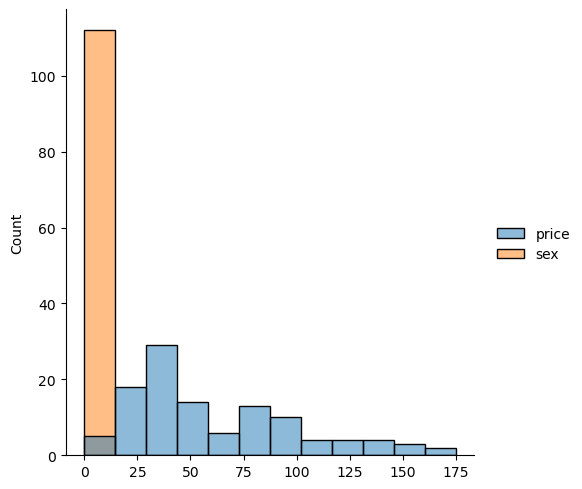

In [21]:
sns.displot(data = numerical)

# takeaways
* our highest price is around 175
* our lowest price is around 25
* our most sold item are around 50



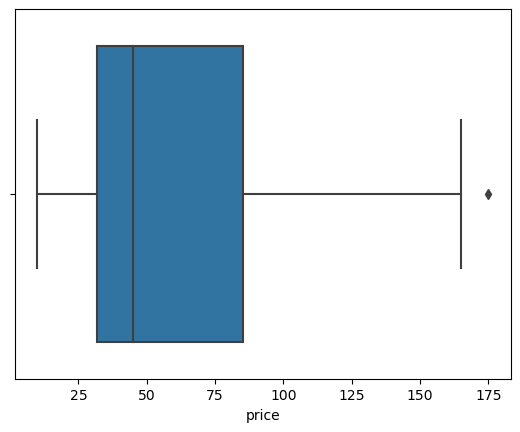

In [23]:
sns.boxplot(x=numerical.price)
plt.show()


# investigate outlier

In [24]:
df[df.price == 175] 

,name,sub_title,brand,model,color,price,currency,availability,available_sizes,uniq_id,sex,gender
68,Air Jordan XXXVI Low Luka PF,Men's Basketball Shoes,Nike,13828097,Laser Blue/Electro Purple/Pink Prime/Electric ...,175.0,USD,InStock,M 7 / W 8.5 | M 7.5 / W 9 | M 8 / W 9.5 | M 8....,68,0,m


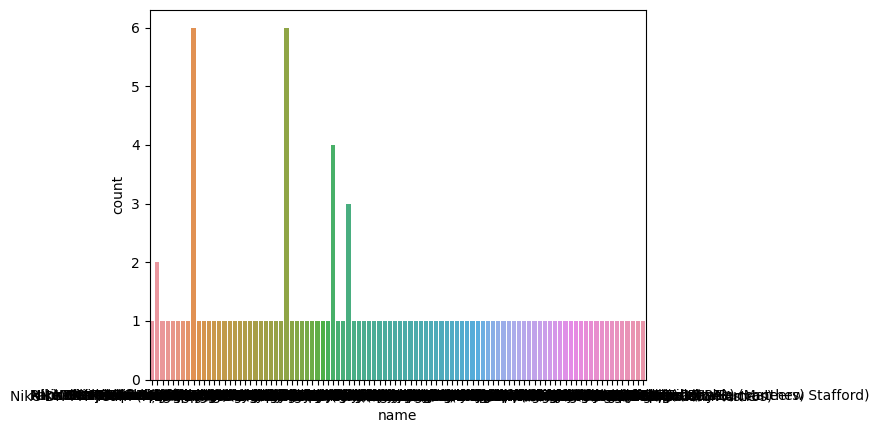

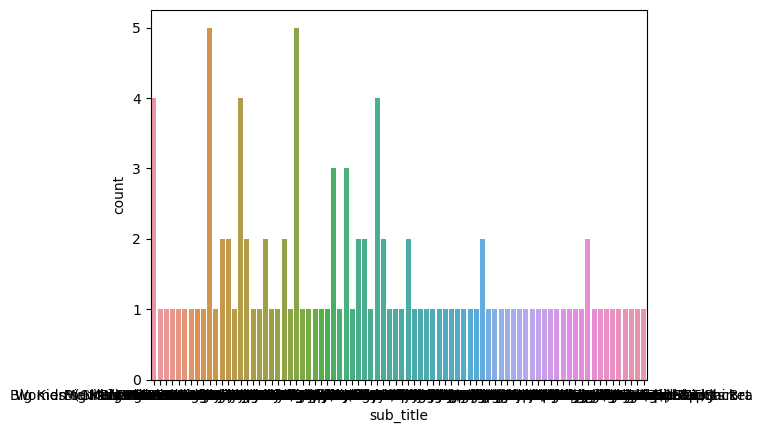

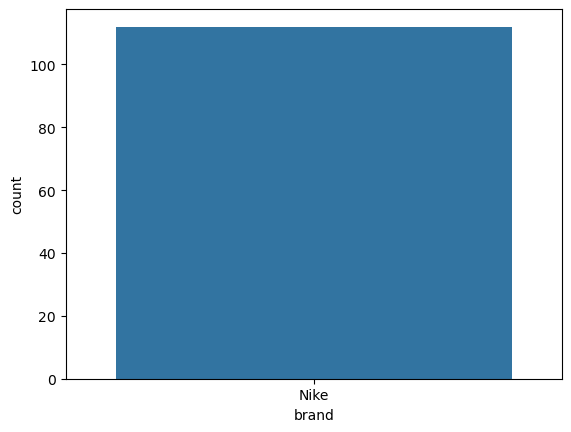

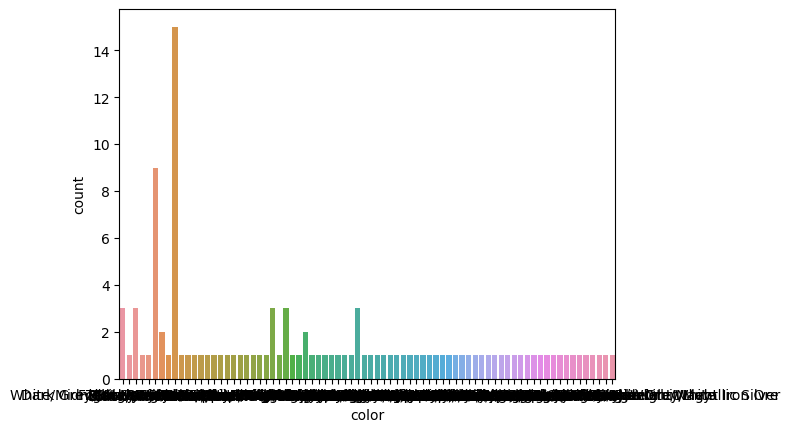

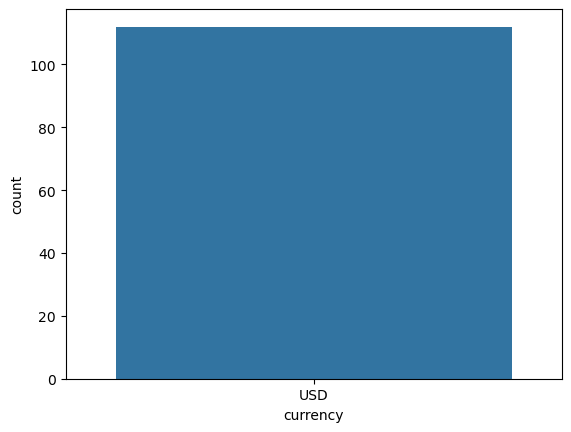

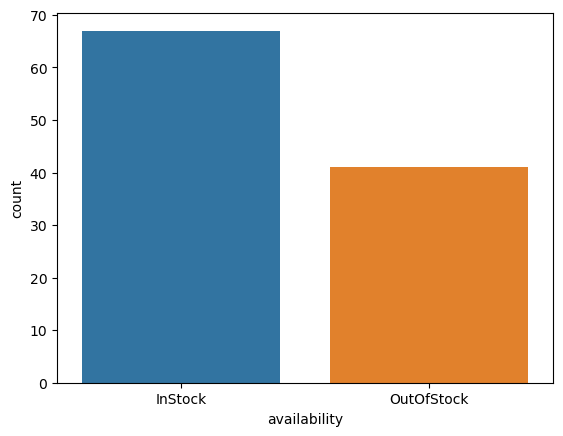

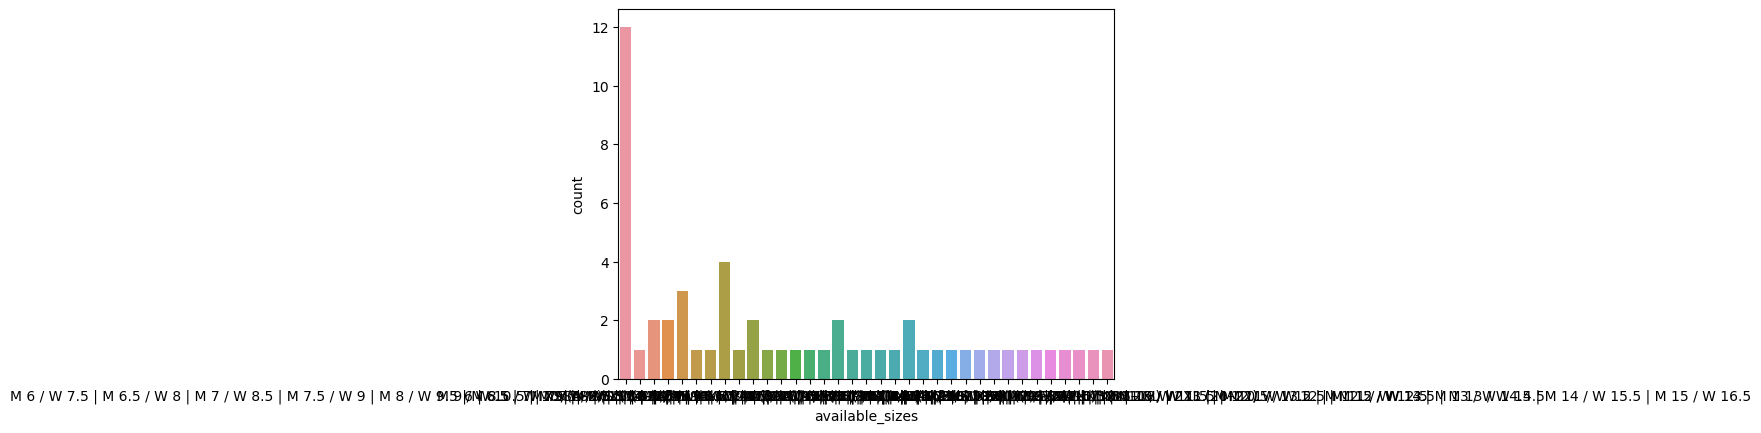

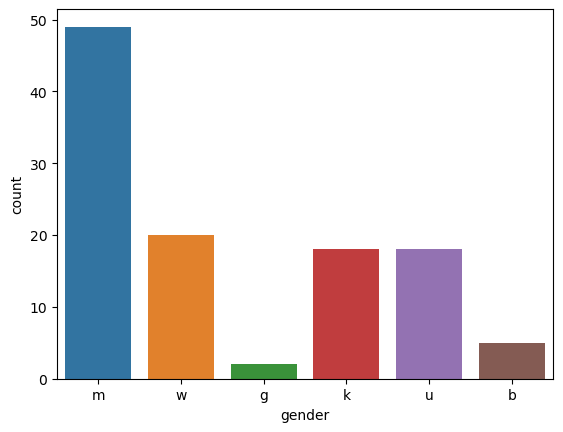

In [26]:
for column in categorical.columns:
    
    sns.countplot(data = categorical, x = column)
    plt.show()

In [28]:
df = df.drop(columns = ['sex','brand','model'])

In [31]:
df = df.set_index(df.uniq_id)

In [33]:
df = df.drop(columns = ['uniq_id'])

In [59]:
df.to_csv('modelNike.csv')

# function to replace availability

In [38]:
df.head(1)

,name,sub_title,color,price,currency,availability,available_sizes,gender
uniq_id,,,,,,,,
0,Nike Dri-FIT Team (MLB Minnesota Twins),Men's Long-Sleeve T-Shirt,Navy,40.0,USD,InStock,S | M | L | XL | 2XL,m


In [56]:
# iterate over each value in the series and replace "InStock" with 1 and "OutStock" with 0
for i in range(len(df.availability)):
    if df.availability[i] == "InStock":
        df.availability[i] = 1
    elif df.availability[i] == "OutOfStock":
        df.availability[i] = 0
    elif df.availability[i] == "OutOfStock":
        df.availability[i] = 0




C:\Users\brand\AppData\Local\Temp\ipykernel_26564\920863992.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.availability[i] = 0


In [57]:
df.availability.value_counts()

1    67
0    41
Name: availability, dtype: int64

In [58]:
df

,name,sub_title,color,price,currency,availability,available_sizes,gender
uniq_id,,,,,,,,
0,Nike Dri-FIT Team (MLB Minnesota Twins),Men's Long-Sleeve T-Shirt,Navy,40.00,USD,1,S | M | L | XL | 2XL,m
1,Club América,Women's Nike Dri-FIT Soccer Jersey Dress,Black/Black,90.00,USD,1,L (12–14),w
2,Nike Sportswear Swoosh,Men's Overalls,Black/White,140.00,USD,0,NaN,m
3,Nike Dri-FIT One Luxe,Big Kids' (Girls') Printed Tights (Extended Size),Black/Rush Pink,22.97,USD,0,NaN,g
4,Paris Saint-Germain Repel Academy AWF,Big Kids' Soccer Jacket,Dark Grey/Black/Siren Red/Siren Red,70.00,USD,1,XS | S | M | L | XL,k
...,...,...,...,...,...,...,...,...
107,Air Jordan XXXV Low DS PF,Basketball Shoes,Hyper Jade/Bright Crimson/Blue Orbit/Metallic ...,165.00,USD,1,NaN,u
108,Nike College Dri-FIT (UCLA),Men's Polo,Signal Blue,50.00,USD,1,S | XL | 2XL,m
109,Jordan,Big Kids' (Boys') Full-Zip Jacket,Black,75.00,USD,0,NaN,b
